In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Set up paths
script_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(script_dir, os.pardir))
tableu_dir = os.path.join(root_dir, 'tableau')
porcessed_data_dir = os.path.join(script_dir, 'processed_data')

In [4]:
output_df = pd.read_csv(os.path.join(tableu_dir, 'bardis_ensemble_python_ver_1000.csv'))
output_df

,Resources,Economy,Bureaucracy,Pollution,time,run_id
0,1.000000,0.100000,1.000000e-02,0.001000,0.0,1.0
1,0.999887,0.100171,1.003014e-02,0.001246,0.2,1.0
2,0.999773,0.100343,1.006030e-02,0.001492,0.4,1.0
3,0.999658,0.100516,1.009050e-02,0.001739,0.6,1.0
4,0.999541,0.100689,1.012073e-02,0.001986,0.8,1.0
...,...,...,...,...,...,...
1000995,0.004725,0.033576,1.231674e-09,1.137058,199.2,1000.0
1000996,0.004726,0.033576,1.190023e-09,1.137058,199.4,1000.0
1000997,0.004727,0.033576,1.149781e-09,1.137059,199.6,1000.0
1000998,0.004728,0.033576,1.110899e-09,1.137059,199.8,1000.0


In [5]:
output_df.min()

Resources      8.368341e-07
Economy        1.428955e-04
Bureaucracy    2.487464e-19
Pollution      1.000000e-03
time           0.000000e+00
run_id         1.000000e+00
dtype: float64

In [6]:
fe = FeatureExtractor()
edau = EDAUtils()

# Time Series Clustering (Simple Approach)

## Create freatures df

In [7]:
transformed_output_df = output_df.groupby("run_id").apply(fe.extract_ts_features).reset_index()
transformed_output_df.head() 

/tmp/ipykernel_34097/2261743549.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  transformed_output_df = output_df.groupby("run_id").apply(fe.extract_ts_features).reset_index()


,run_id,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_final_initial_diff,Resources_delta_25,Resources_delta_50,Resources_delta_75,Resources_delta_100,...,Pollution_auc,Pollution_final_initial_diff,Pollution_delta_25,Pollution_delta_50,Pollution_delta_75,Pollution_delta_100,Pollution_delta_125,Pollution_delta_150,Pollution_delta_175,Pollution_delta_200
0,1.0,0.327750,1.0,0.327750,134.085470,-0.672250,-0.001629,-0.003236,-0.005007,-0.005822,...,51.034141,0.545766,0.001640,0.002300,0.003124,0.003760,0.003759,0.003144,2.438919e-03,1.970209e-03
1,2.0,0.002006,1.0,0.001829,38.145268,-0.997994,-0.009890,-0.026944,-0.000004,0.000001,...,153.114747,1.138756,0.002359,0.007210,0.030529,0.002166,0.000082,0.000003,1.783411e-07,7.114252e-08
2,3.0,0.000137,1.0,0.000137,51.722369,-0.999863,-0.005162,-0.020499,-0.003894,-0.000003,...,122.587922,1.022778,0.001526,0.003003,0.016088,0.012512,0.000183,0.000004,1.461290e-06,1.433237e-06
3,4.0,0.007580,1.0,0.006707,49.357691,-0.992420,-0.004429,-0.039234,-0.000186,0.000007,...,148.952138,1.120043,0.001257,0.003964,0.048079,0.000132,0.000004,0.000004,3.927006e-06,4.024407e-06
4,5.0,0.597663,1.0,0.597663,157.144057,-0.402337,-0.001836,-0.002620,-0.002916,-0.002551,...,43.802595,0.452603,0.001729,0.002228,0.002628,0.002724,0.002557,0.002337,2.166121e-03,2.037863e-03


In [8]:
transformed_output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   run_id                          1000 non-null   float64
 1   Resources_final                 1000 non-null   float64
 2   Resources_max                   1000 non-null   float64
 3   Resources_min                   1000 non-null   float64
 4   Resources_auc                   1000 non-null   float64
 5   Resources_final_initial_diff    1000 non-null   float64
 6   Resources_delta_25              1000 non-null   float64
 7   Resources_delta_50              1000 non-null   float64
 8   Resources_delta_75              1000 non-null   float64
 9   Resources_delta_100             1000 non-null   float64
 10  Resources_delta_125             1000 non-null   float64
 11  Resources_delta_150             1000 non-null   float64
 12  Resources_delta_175             100

## Data Cleaning

- Drop duplicates?

In [9]:
transformed_output_df.isnull().sum().sort_values(ascending=False).head()


run_id             0
Resources_final    0
Resources_max      0
Resources_min      0
Resources_auc      0
dtype: int64

In [10]:
# Check for duplicates
transformed_output_df.duplicated().sum()

np.int64(0)

In [11]:
# Drop run_id to create features dataframe
features_df = transformed_output_df.drop(columns=["run_id"])
features_df.head()

,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_final_initial_diff,Resources_delta_25,Resources_delta_50,Resources_delta_75,Resources_delta_100,Resources_delta_125,...,Pollution_auc,Pollution_final_initial_diff,Pollution_delta_25,Pollution_delta_50,Pollution_delta_75,Pollution_delta_100,Pollution_delta_125,Pollution_delta_150,Pollution_delta_175,Pollution_delta_200
0,0.327750,1.0,0.327750,134.085470,-0.672250,-0.001629,-0.003236,-0.005007,-0.005822,-4.890972e-03,...,51.034141,0.545766,0.001640,0.002300,0.003124,0.003760,0.003759,0.003144,2.438919e-03,1.970209e-03
1,0.002006,1.0,0.001829,38.145268,-0.997994,-0.009890,-0.026944,-0.000004,0.000001,1.558311e-06,...,153.114747,1.138756,0.002359,0.007210,0.030529,0.002166,0.000082,0.000003,1.783411e-07,7.114252e-08
2,0.000137,1.0,0.000137,51.722369,-0.999863,-0.005162,-0.020499,-0.003894,-0.000003,-7.064481e-08,...,122.587922,1.022778,0.001526,0.003003,0.016088,0.012512,0.000183,0.000004,1.461290e-06,1.433237e-06
3,0.007580,1.0,0.006707,49.357691,-0.992420,-0.004429,-0.039234,-0.000186,0.000007,7.787669e-06,...,148.952138,1.120043,0.001257,0.003964,0.048079,0.000132,0.000004,0.000004,3.927006e-06,4.024407e-06
4,0.597663,1.0,0.597663,157.144057,-0.402337,-0.001836,-0.002620,-0.002916,-0.002551,-1.967433e-03,...,43.802595,0.452603,0.001729,0.002228,0.002628,0.002724,0.002557,0.002337,2.166121e-03,2.037863e-03


## EDA

In [12]:
def get_stock_var_features_subset(df, stock_var_name):
    subset_df = df[[col for col in df.columns if col.startswith(stock_var_name)]].copy()
    return subset_df

In [13]:
resources_feat_df = get_stock_var_features_subset(features_df, 'Resources')
resources_feat_df.describe()

,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_final_initial_diff,Resources_delta_25,Resources_delta_50,Resources_delta_75,Resources_delta_100,Resources_delta_125,Resources_delta_150,Resources_delta_175,Resources_delta_200
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.427135e-02,1.000020,4.384745e-02,69.510839,-0.955729,-0.003742,-0.017509,-0.011949,-3.930233e-03,-0.001177,-3.804386e-04,-1.681224e-04,-1.067623e-04
std,1.147264e-01,0.000209,1.146910e-01,26.139275,0.114726,0.001914,0.015597,0.010965,6.286366e-03,0.002816,1.170652e-03,5.658245e-04,3.539421e-04
min,8.999271e-07,1.000000,8.368341e-07,37.071547,-0.999999,-0.010268,-0.064502,-0.042548,-2.982395e-02,-0.017812,-1.114533e-02,-5.144124e-03,-2.873123e-03
25%,9.236309e-04,1.000000,8.584426e-04,51.391689,-0.999076,-0.004910,-0.024349,-0.020925,-6.094650e-03,-0.000291,-3.055465e-05,-1.521564e-05,-1.226434e-05
50%,5.234409e-03,1.000000,4.978406e-03,62.538383,-0.994766,-0.003544,-0.011237,-0.009235,-1.406381e-04,-0.000002,-9.053063e-08,-1.380168e-08,-6.325559e-09
75%,2.781425e-02,1.000000,2.679618e-02,80.576017,-0.972186,-0.002249,-0.005828,-0.001057,-7.837630e-07,0.000001,1.912113e-06,2.148084e-06,2.219757e-06
max,8.013442e-01,1.004355,8.013442e-01,178.984522,-0.198656,-0.000212,-0.001199,0.000002,3.771475e-05,0.000194,2.499837e-04,2.620534e-04,2.730425e-04


In [14]:
economy_feat_df = get_stock_var_features_subset(features_df, 'Economy')
economy_feat_df.describe()

,Economy_final,Economy_max,Economy_min,Economy_auc,Economy_final_initial_diff,Economy_delta_25,Economy_delta_50,Economy_delta_75,Economy_delta_100,Economy_delta_125,Economy_delta_150,Economy_delta_175,Economy_delta_200
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,0.179218,0.579288,0.073982,43.265966,0.079218,0.002937,0.008831,-0.003224,-0.002666,-1.119338e-03,-3.260270e-04,-7.817777e-05,-1.721313e-05
std,0.164380,0.129972,0.036007,20.506808,0.164380,0.001510,0.012240,0.015839,0.007710,3.595138e-03,1.343480e-03,4.962702e-04,1.724727e-04
min,0.000143,0.186713,0.000143,14.709476,-0.099857,0.000809,-0.076144,-0.050739,-0.034047,-2.705010e-02,-1.542998e-02,-6.283484e-03,-4.220210e-03
25%,0.043513,0.494450,0.043513,26.192745,-0.056487,0.001669,0.003495,-0.012126,-0.004939,-7.198880e-04,-5.062456e-05,-4.048178e-06,-2.208337e-06
50%,0.130363,0.595521,0.100000,39.562484,0.030363,0.002682,0.007354,0.001311,-0.000323,-1.874212e-05,-1.597186e-06,-1.043205e-06,-8.754287e-07
75%,0.275187,0.674459,0.100000,57.163440,0.175187,0.003926,0.014749,0.007817,-0.000003,-7.669433e-07,-4.032632e-07,-2.714117e-07,-2.576973e-07
max,0.721046,0.852612,0.100000,104.254201,0.621046,0.007881,0.036060,0.022589,0.016526,1.012222e-02,4.487390e-03,2.199645e-03,8.109045e-04


In [15]:
bureaucracy_feat_df = get_stock_var_features_subset(features_df, 'Bureaucracy')
bureaucracy_feat_df.describe()

,Bureaucracy_final,Bureaucracy_max,Bureaucracy_min,Bureaucracy_auc,Bureaucracy_final_initial_diff,Bureaucracy_delta_25,Bureaucracy_delta_50,Bureaucracy_delta_75,Bureaucracy_delta_100,Bureaucracy_delta_125,Bureaucracy_delta_150,Bureaucracy_delta_175,Bureaucracy_delta_200
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.677240e-04,0.405274,4.399699e-04,12.500280,-0.009332,0.000529,0.006630,-0.000807,-0.004639,-0.001924,-6.116734e-04,-1.603485e-04,-3.788992e-05
std,4.173256e-03,0.237658,1.663036e-03,5.822985,0.004173,0.000318,0.013411,0.020810,0.010136,0.004330,1.780539e-03,6.641179e-04,1.954975e-04
min,2.487464e-19,0.011952,2.487464e-19,0.982568,-0.010000,0.000029,-0.000101,-0.055841,-0.040523,-0.026421,-1.848663e-02,-1.183925e-02,-3.552587e-03
25%,1.098384e-10,0.214363,1.098384e-10,8.750418,-0.010000,0.000268,0.000574,-0.006646,-0.010133,-0.002096,-2.966023e-04,-3.342394e-05,-1.981918e-06
50%,7.590497e-08,0.390068,7.590497e-08,11.627332,-0.010000,0.000455,0.001659,0.001736,-0.001437,-0.000227,-1.769564e-05,-5.520250e-07,-1.218376e-08
75%,1.526685e-05,0.593483,1.526685e-05,15.877203,-0.009985,0.000724,0.004941,0.010657,0.000215,-0.000012,-2.924203e-07,-2.775627e-09,-2.410492e-11
max,1.034449e-01,0.957350,1.000000e-02,31.564683,0.093445,0.001729,0.081426,0.049529,0.030235,0.016006,6.269211e-03,1.198766e-03,-8.935399e-20


In [16]:
pollution_feat_df = get_stock_var_features_subset(features_df, 'Pollution')
pollution_feat_df.describe()

,Pollution_final,Pollution_max,Pollution_min,Pollution_auc,Pollution_final_initial_diff,Pollution_delta_25,Pollution_delta_50,Pollution_delta_75,Pollution_delta_100,Pollution_delta_125,Pollution_delta_150,Pollution_delta_175,Pollution_delta_200
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,0.970739,0.970739,1.000000e-03,109.868298,0.969739,0.001416,0.002915,0.016360,0.011391,4.307300e-03,1.384421e-03,4.655212e-04,2.168232e-04
std,0.198118,0.198118,4.338979e-19,32.233567,0.198118,0.000417,0.001573,0.016582,0.010720,6.395255e-03,3.010307e-03,1.290060e-03,5.985508e-04
min,0.335253,0.335253,1.000000e-03,29.369596,0.334253,0.000589,0.000866,0.001290,0.000004,2.482583e-07,8.089784e-08,2.559346e-08,1.028981e-08
25%,0.884772,0.884772,1.000000e-03,86.868055,0.883772,0.001069,0.001976,0.003656,0.002939,6.348476e-05,5.594850e-06,1.996394e-06,1.431781e-06
50%,1.043541,1.043541,1.000000e-03,115.271536,1.042541,0.001403,0.002549,0.007616,0.007063,1.063606e-03,5.375017e-05,1.379714e-05,7.268176e-06
75%,1.120011,1.120011,1.000000e-03,136.913737,1.119011,0.001742,0.003449,0.027946,0.018973,6.044391e-03,1.366371e-03,1.552503e-04,6.550762e-05
max,1.202567,1.202567,1.000000e-03,160.913230,1.201567,0.002463,0.013602,0.066008,0.046585,3.115708e-02,2.591139e-02,1.596562e-02,8.588010e-03


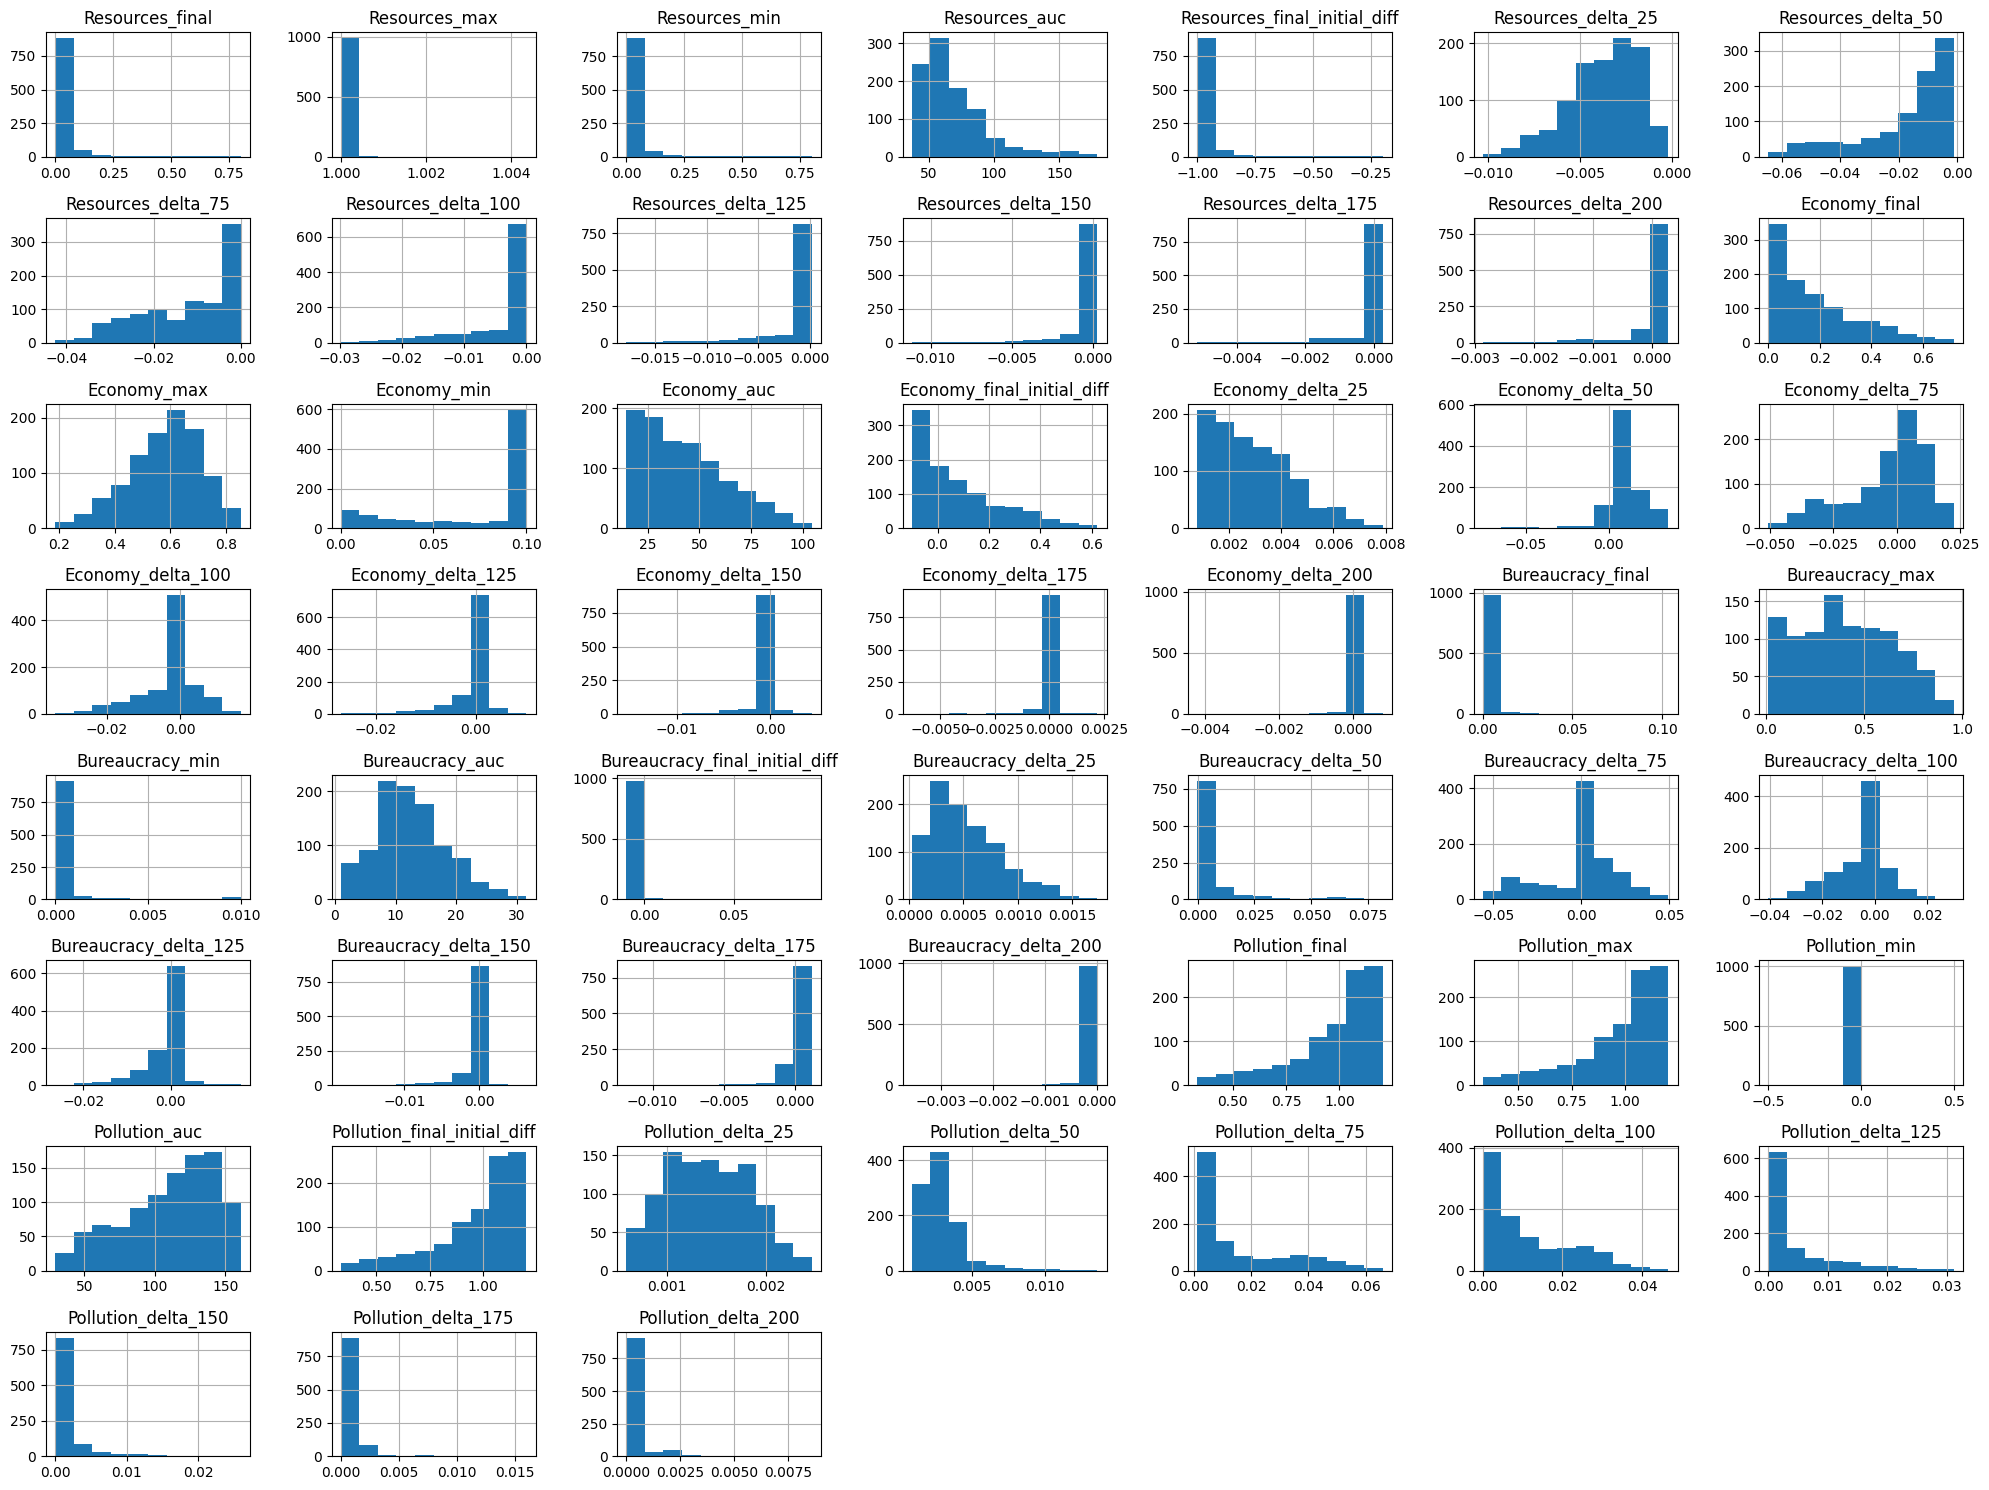

In [17]:
edau.plot_histograms(features_df)

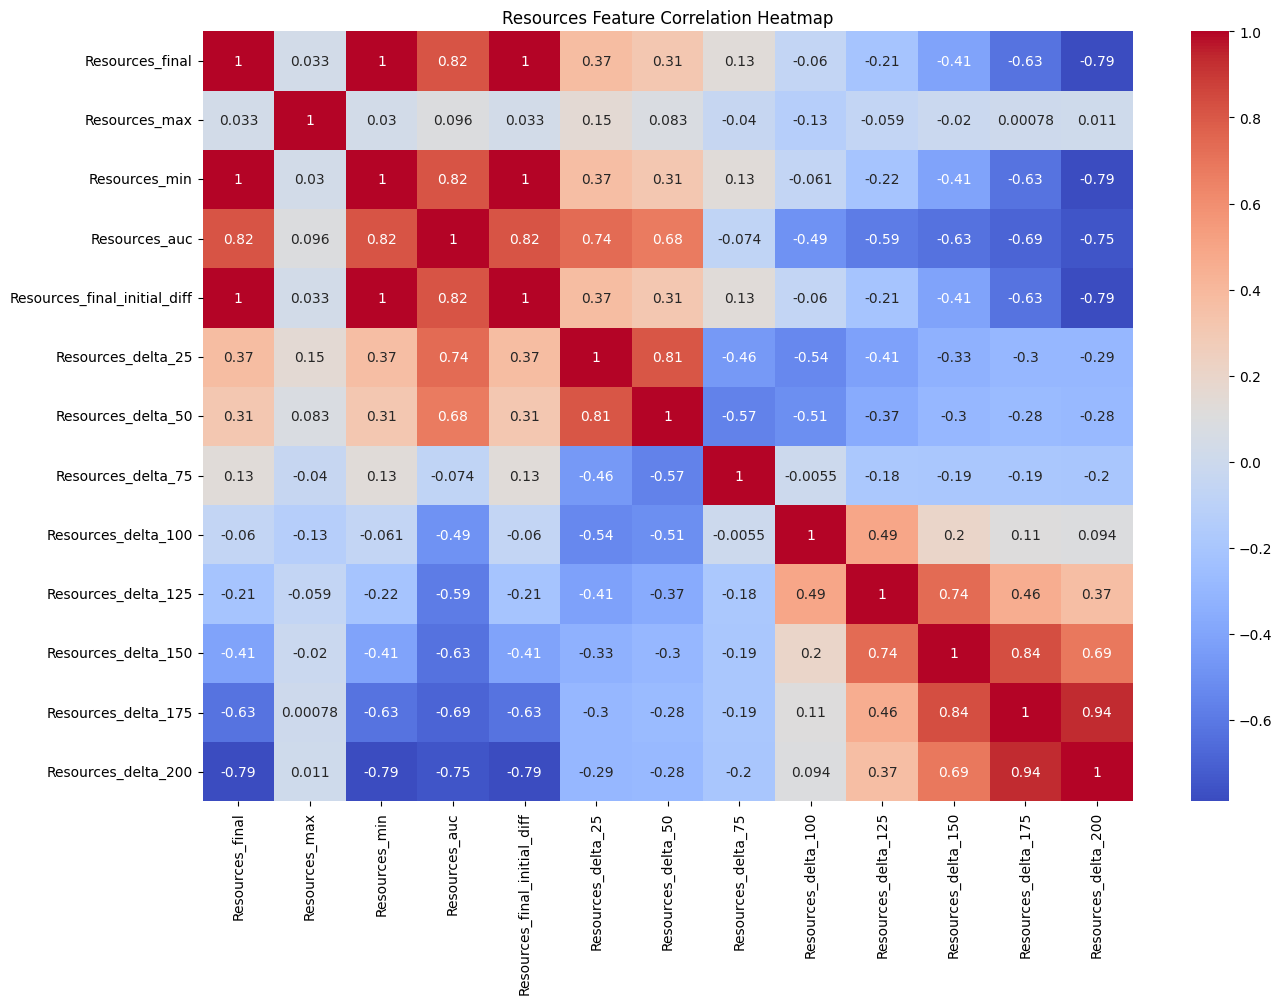

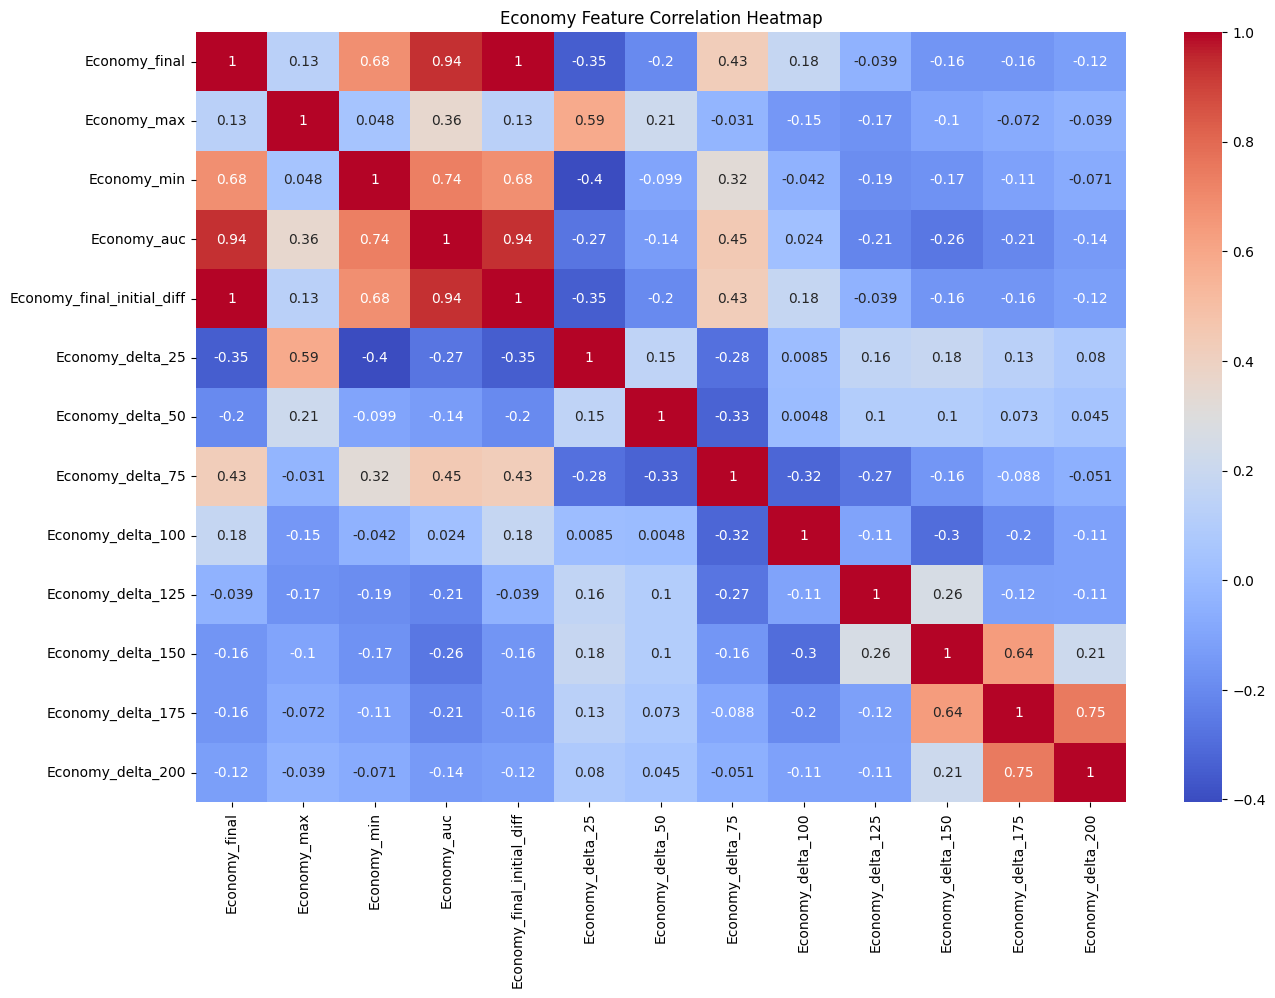

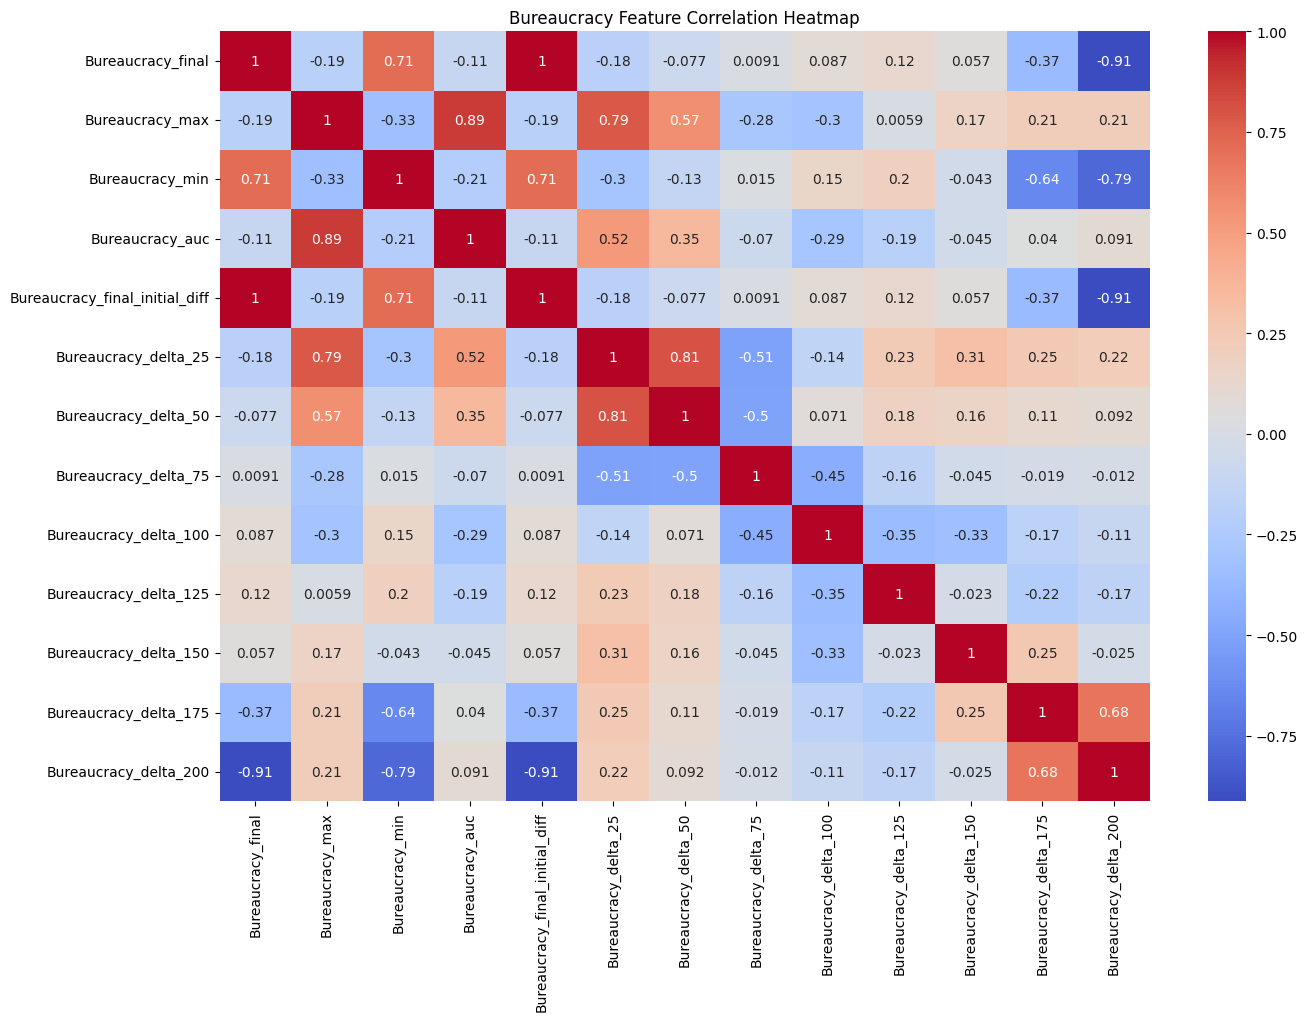

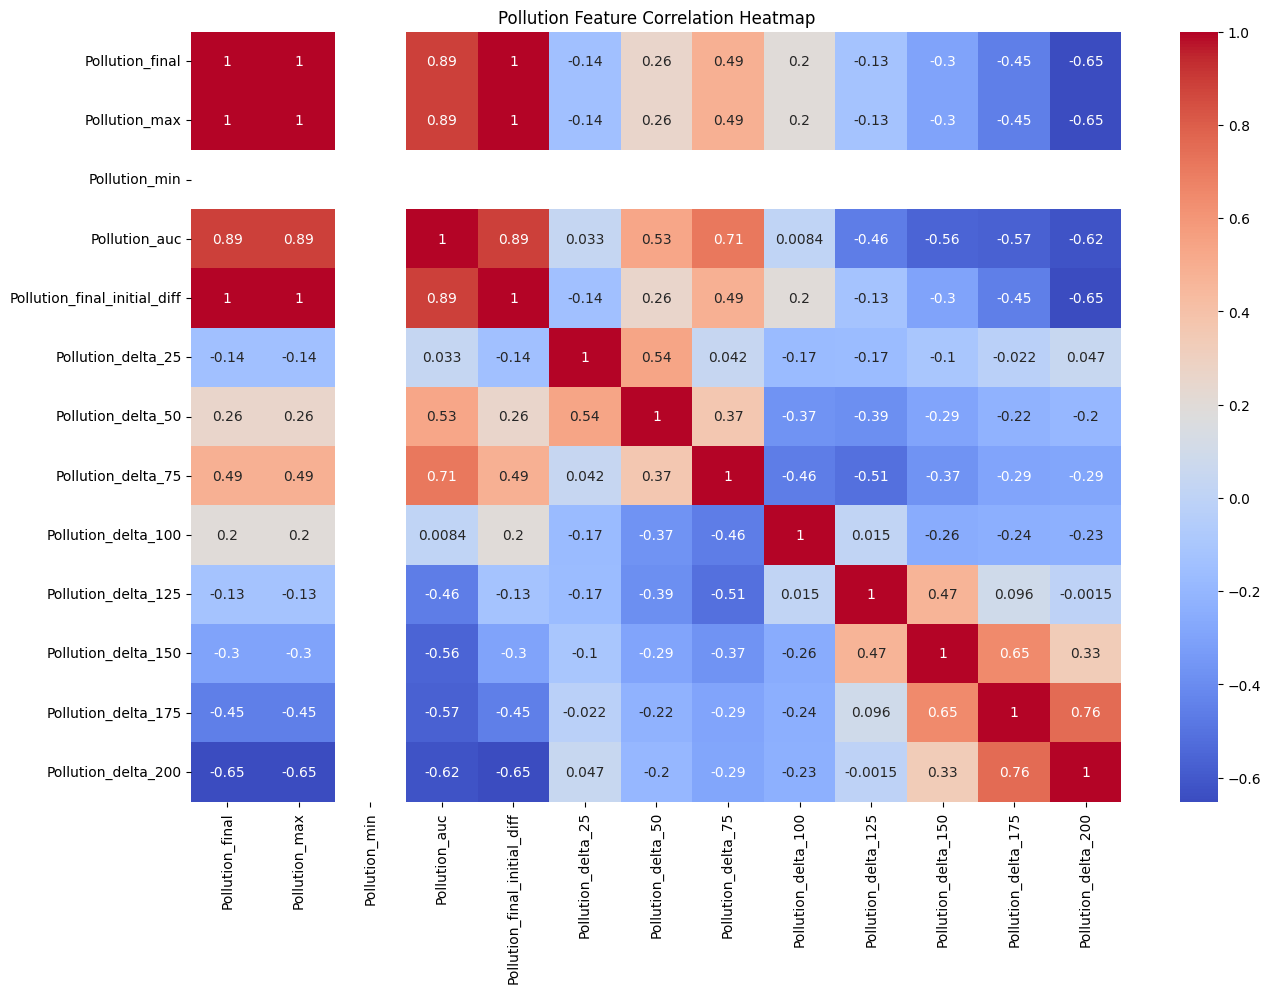

In [18]:
# Correlation heatmap to inspect relationships between features in each stock variable
def plot_corr_heatmap(df, stock_var_name):
    plt.figure(figsize=(15, 10))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title(f"{stock_var_name} Feature Correlation Heatmap")
    plt.show()

plot_corr_heatmap(resources_feat_df, "Resources")
plot_corr_heatmap(economy_feat_df, "Economy")
plot_corr_heatmap(bureaucracy_feat_df, "Bureaucracy")
plot_corr_heatmap(pollution_feat_df, "Pollution")

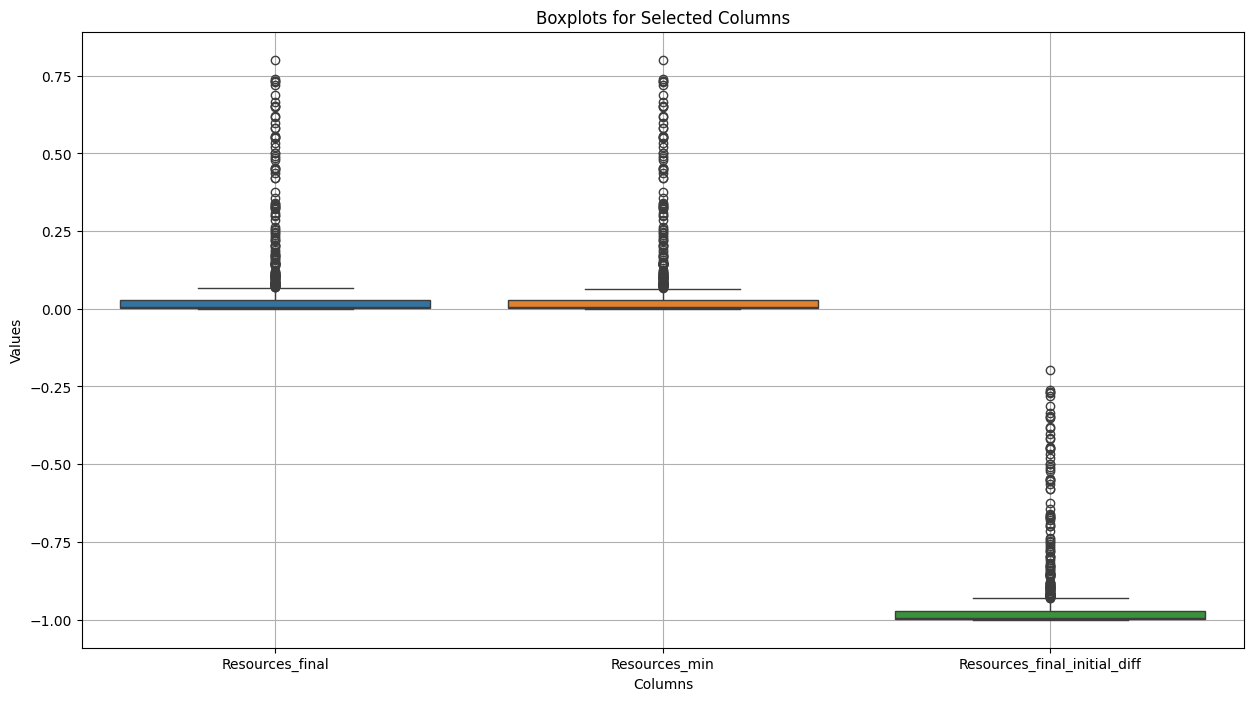

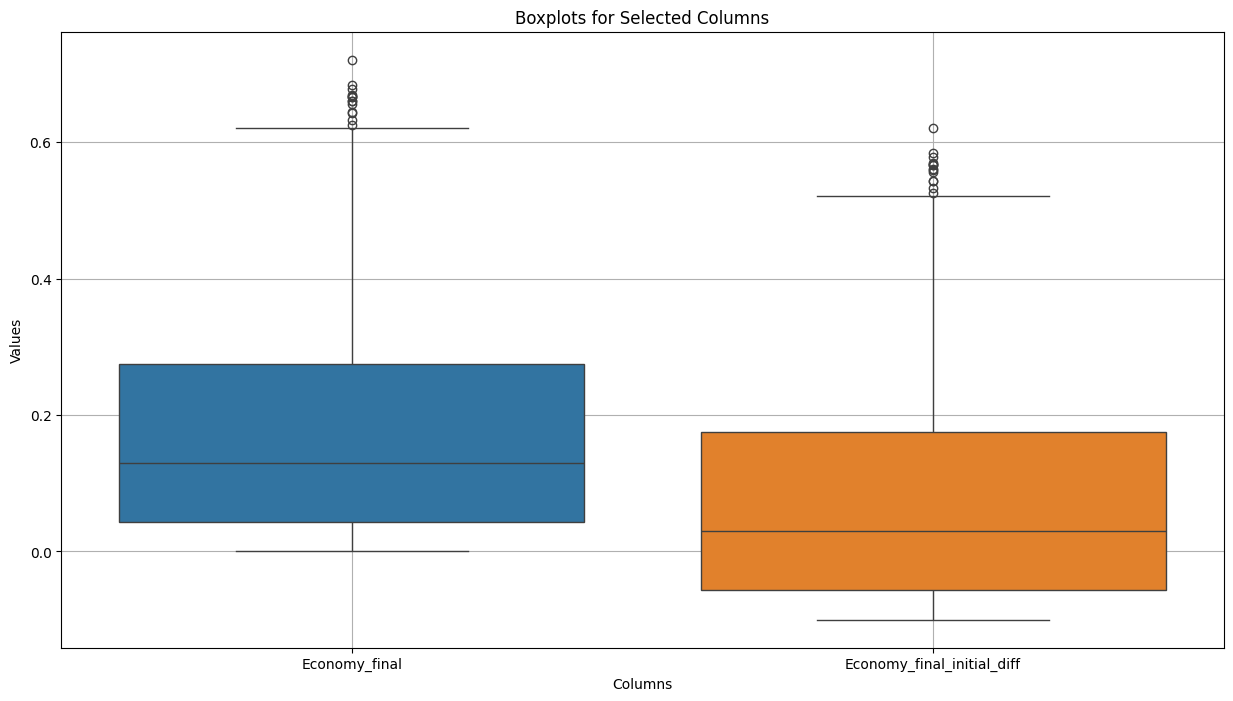

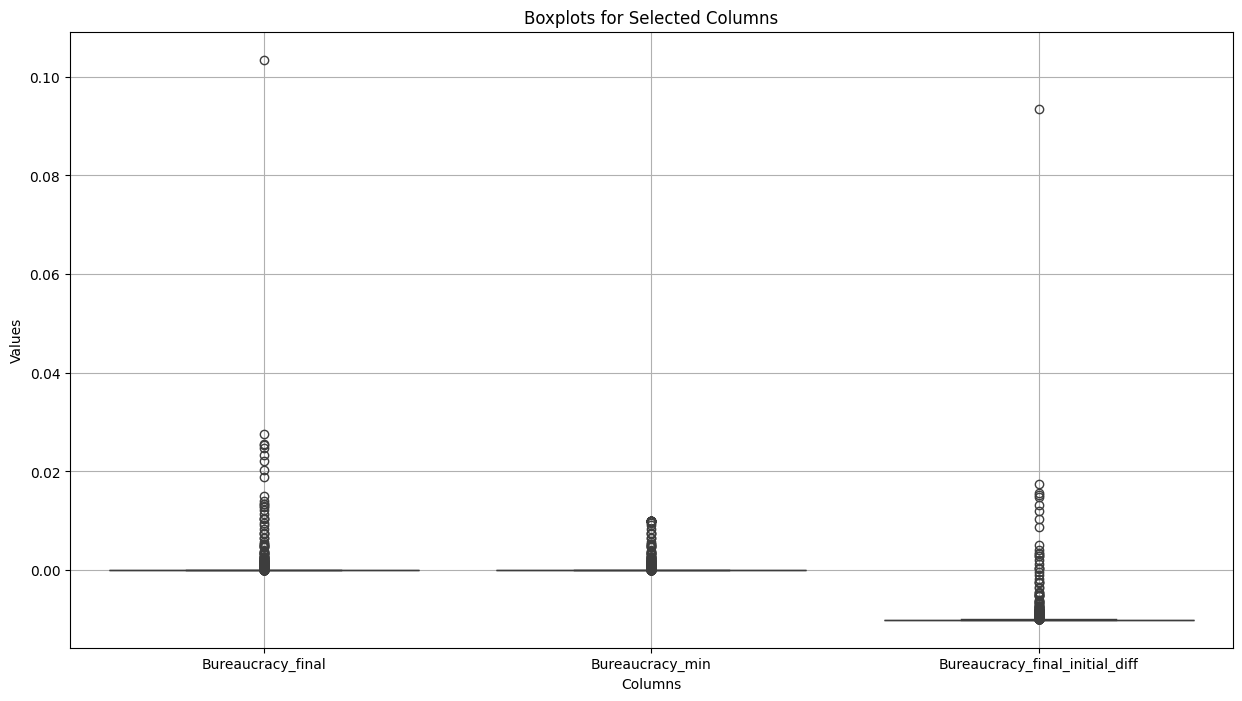

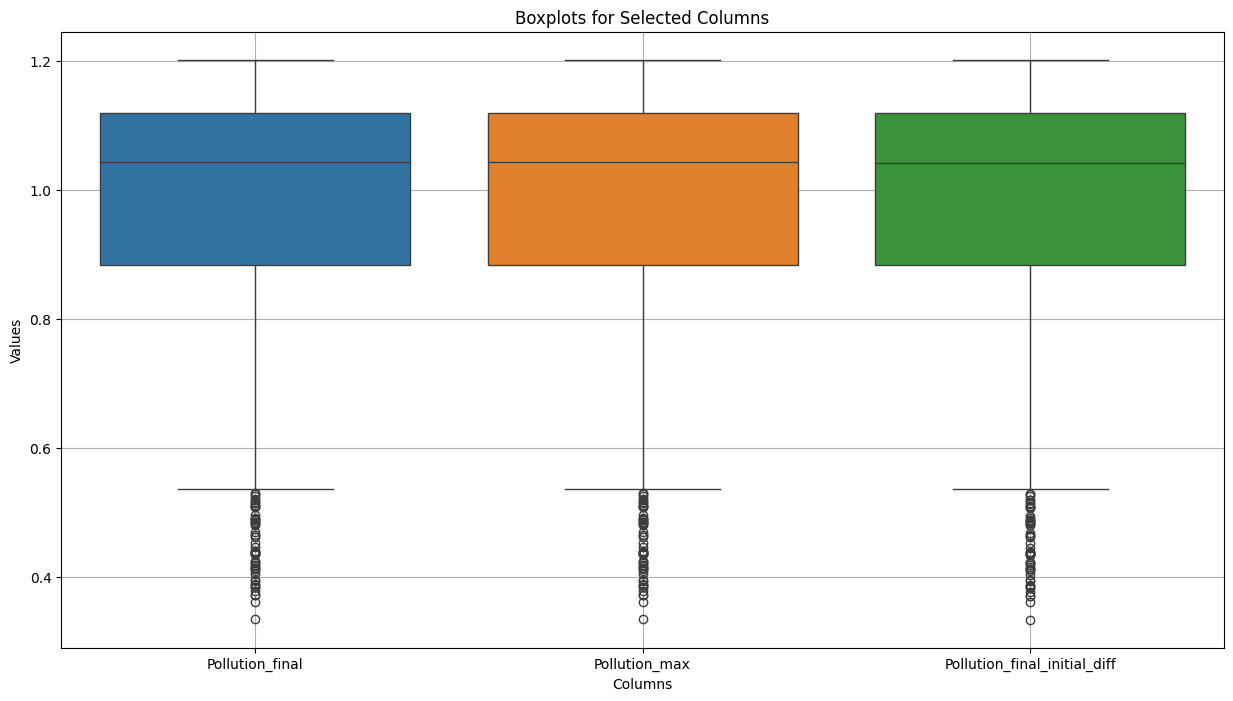

In [19]:
def plot_boxplots(df, columns):
    """
    Plots a single figure with boxplots for the specified columns in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data.
    - columns: list of column names to create boxplots for.
    """
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df[columns])
    plt.title("Boxplots for Selected Columns")
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.grid(True)
    plt.show()


plot_boxplots(resources_feat_df, ['Resources_final', 'Resources_min', 'Resources_final_initial_diff'])
plot_boxplots(economy_feat_df, ['Economy_final', 'Economy_final_initial_diff'])
plot_boxplots(bureaucracy_feat_df, ['Bureaucracy_final', 'Bureaucracy_min', 'Bureaucracy_final_initial_diff'])
plot_boxplots(pollution_feat_df, ['Pollution_final', 'Pollution_max', 'Pollution_final_initial_diff'])

## Data Preprocessing

In [20]:
# We drop redoundant variables and variable with very tight distributions
features_df = features_df.drop(columns=['Resources_max', 
                                        'Pollution_min', 
                                        'Resources_min', 
                                        'Resources_final_initial_diff', 
                                        'Pollution_max', 
                                        'Pollution_final_initial_diff', 
                                        'Bureaucracy_min', 
                                        'Bureaucracy_final_initial_diff', 
                                        'Economy_final_initial_diff'])


In [21]:
# # Calculate skewness for numeric features in the DataFrame
# skewness = features_df.skew(numeric_only=True)
# # print("Skewness of features:\n", skewness)

# # Define a threshold for high skewness, e.g., absolute skewness > 1
# threshold = 1
# skewed_features = skewness[abs(skewness) > threshold].index.tolist()
# print("Skewed features:", skewed_features)

In [22]:
# features_df_no_skew = features_df.drop(columns=skewed_features)

In [23]:
# # Histograms for each numeric feature
# edau.plot_histograms(features_df[skewed_features])

In [24]:
# # Log-transform the skewed features
# features_df_log = features_df.copy()

# # TODO: Only to skewed features or to all features?
# features_df_log = edau.apply_log_transform(features_df_log, skewed_features)

In [25]:
# edau.plot_histograms(features_df_log[skewed_features])

In [26]:
# Scale the features
X = features_df.copy()
# X = features_df_log.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(1000, 43)

### PCA

Number of components selected: 10


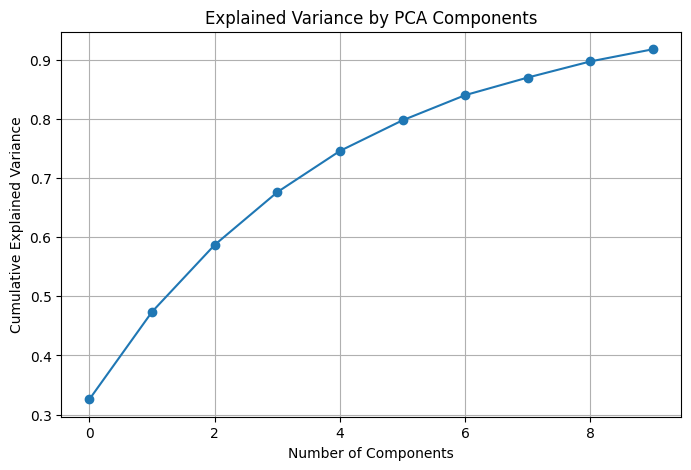

In [27]:
# Retain enough components to explain 90% of the variance
pca = PCA(n_components=0.9, random_state=42)
df_pca = pca.fit_transform(X_scaled)



print("Number of components selected:", pca.n_components_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

Explained variance ratio for all components: [3.25869130e-01 1.47991799e-01 1.13197963e-01 8.92251524e-02
 6.96911011e-02 5.18266071e-02 4.25543691e-02 2.98148693e-02
 2.72732490e-02 2.05960789e-02 1.94010519e-02 1.28265094e-02
 1.21607490e-02 7.71383026e-03 6.59676206e-03 5.29433673e-03
 4.08000701e-03 3.20037857e-03 2.42453171e-03 1.83115017e-03
 1.37076181e-03 1.12549547e-03 1.05469801e-03 6.98552976e-04
 5.17744813e-04 4.83907299e-04 3.38818331e-04 2.78189973e-04
 1.73053952e-04 1.21704836e-04 8.16572898e-05 7.72578499e-05
 6.60638599e-05 3.07337962e-05 7.03960577e-06 4.35498643e-06
 2.18219957e-07 6.29863503e-08 3.70494332e-08 1.57568461e-08
 4.43084479e-09 6.63060990e-10 1.79918885e-10]


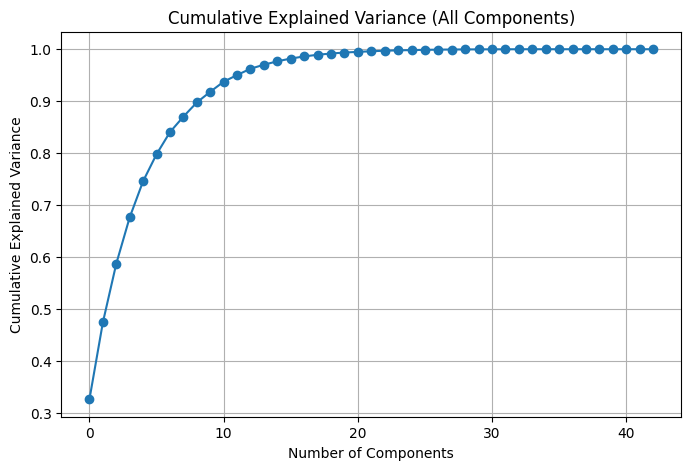

In [28]:
pca_full = PCA(n_components=None, random_state=42)
df_pca_full = pca_full.fit_transform(X_scaled)
print("Explained variance ratio for all components:", pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance (All Components)")
plt.grid(True)
plt.show()


In [29]:
# # Each row = feature, each column = principal component
# loadings = pd.DataFrame(
#     pca_full.components_.T,  # Transpose to have features as rows
#     index=features_df_log.columns,  # Feature names
#     columns=[f'PC{i+1}' for i in range(pca_full.n_components_)]
# )

# # Select top N components to visualize
# top_n = 5
# plt.figure(figsize=(12, min(0.5 * len(loadings), 12)))
# sns.heatmap(loadings.iloc[:, :top_n], annot=True, cmap='coolwarm', center=0)
# plt.title(f"PCA Loadings (Top {top_n} Components)")
# plt.xlabel("Principal Components")
# plt.ylabel("Original Features")
# plt.tight_layout()
# plt.show()

# # Create a dataframe that shows the relationship between the components and the original variables
# df_pca_comp = pd.DataFrame(data = pca.components_,
#                            columns = features_df_log.columns)

# # Create the Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
# plt.figure(figsize=(70,10))
# sns.heatmap(df_pca_comp,
#             vmin = -1, 
#             vmax = 1,
#             cmap = 'RdBu',
#             annot = True)

# plt.title('Components vs Original Features',fontsize = 14)
# plt.show()

In [30]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32586913, 0.47386093, 0.58705889, 0.67628404, 0.74597515,
       0.79780175, 0.84035612, 0.87017099, 0.89744424, 0.91804032])

In [31]:
df_pca.shape

(1000, 10)

In [32]:
rows_n = df_pca.shape[0]

## Train Models

### Visualization Functions

### K means

In [33]:
def plot_clusters(df, clusters, principal_component_x=0, principal_component_y=1, principal_component_z=None):
    """
    Plots clusters using 2D or 3D PCA-transformed data.

    Parameters:
    - df: ndarray or DataFrame with PCA components
    - clusters: cluster labels
    - principal_component_x, principal_component_y: indexes of PCA components for 2D plot
    - principal_component_z: index of third component for 3D plot (optional)
    """
    
    if principal_component_z is not None and df.shape[1] > principal_component_z:
        # 3D Plot
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(
            df[:, principal_component_x], 
            df[:, principal_component_y], 
            df[:, principal_component_z], 
            c=clusters, cmap="plasma", edgecolor='k'
        )
        ax.set_xlabel(f"Principal Component {principal_component_x + 1}")
        ax.set_ylabel(f"Principal Component {principal_component_y + 1}")
        ax.set_zlabel(f"Principal Component {principal_component_z + 1}")
        ax.set_title("Cluster Visualization (PCA 3D)")

        # Create legend
        unique_clusters = np.unique(clusters)
        handles = [
            mpatches.Patch(color=scatter.cmap(scatter.norm(cl)), label=f"Cluster {cl}")
            for cl in unique_clusters
        ]
        ax.legend(handles=handles, title="Cluster Label", loc="upper left")
        plt.show()

    elif df.shape[1] >= 2:
        # 2D Plot
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(
            df[:, principal_component_x], 
            df[:, principal_component_y], 
            c=clusters, cmap="plasma", edgecolor='k'
        )
        plt.xlabel(f"Principal Component {principal_component_x + 1}")
        plt.ylabel(f"Principal Component {principal_component_y + 1}")
        plt.title("Cluster Visualization (PCA 2D)")
        plt.grid(True)

        unique_clusters = np.unique(clusters)
        handles = [
            mpatches.Patch(color=scatter.cmap(scatter.norm(cl)), label=f"Cluster {cl}")
            for cl in unique_clusters
        ]
        plt.legend(handles=handles, title="Cluster Label", loc="best")
        plt.show()
    
    else:
        print("Not enough components to visualize clusters.")
        
    return None


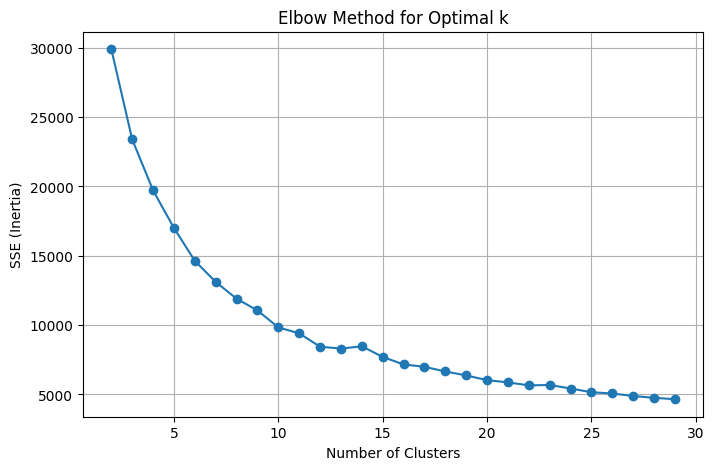

In [34]:
sse = []
k_range = range(2, 30)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(k_range), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


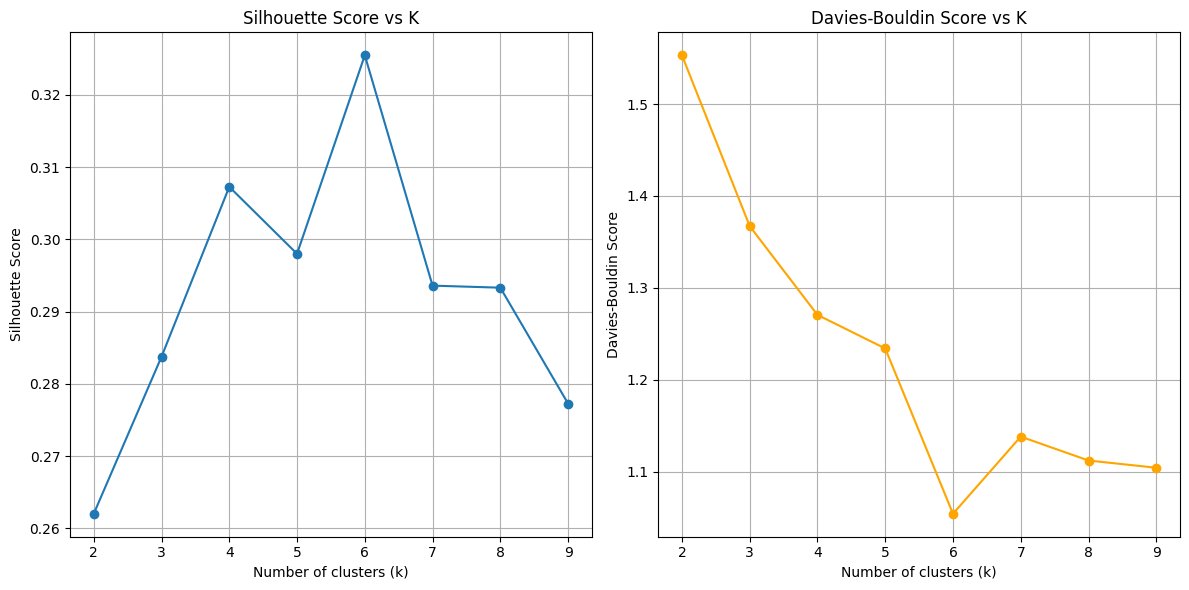

In [36]:
# Define the range of k (number of clusters) to test
k_values = range(2, 10) 

results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(df_pca)
    
    # Evaluate scores
    silhouette = silhouette_score(df_pca, labels)
    dbi = davies_bouldin_score(df_pca, labels)

    results.append({
        "k": k,
        "silhouette_score": silhouette,
        "davies_bouldin": dbi
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results_df["k"], results_df["silhouette_score"], marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(results_df["k"], results_df["davies_bouldin"], marker='o', color='orange')
plt.title("Davies-Bouldin Score vs K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [52]:
k = 4 # Adjust this value based on the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_pca)

# Evaluate clustering quality
sil_score = silhouette_score(df_pca, clusters_kmeans)
print("Silhouette Score:", sil_score)

dbi = davies_bouldin_score(df_pca, clusters_kmeans)
print(f"Davies-Bouldin Score: {dbi:.3f}")

Silhouette Score: 0.3072607877211955
Davies-Bouldin Score: 1.271


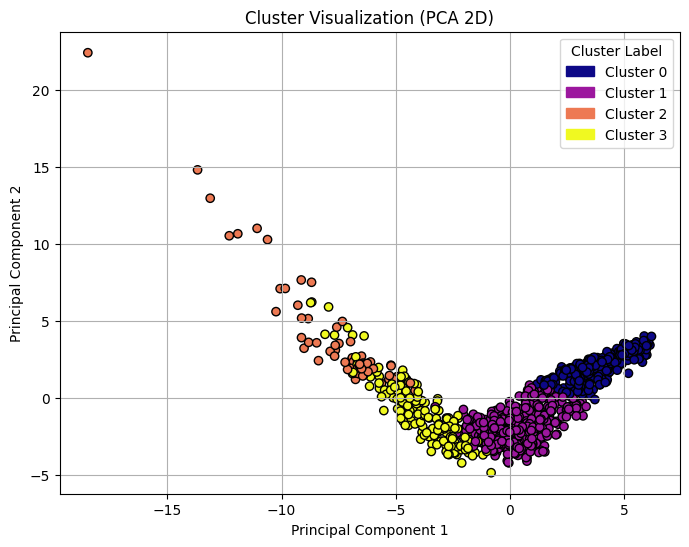

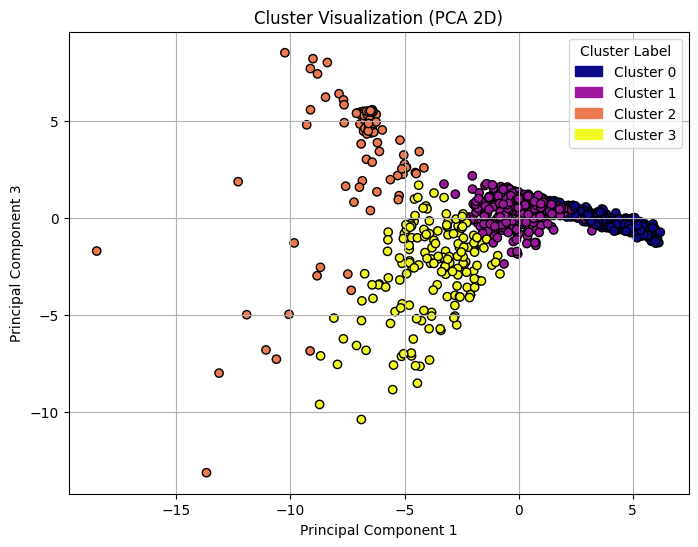

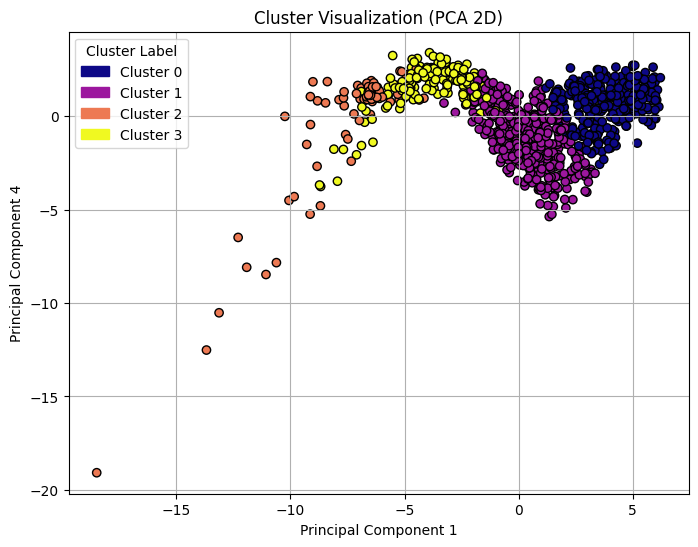

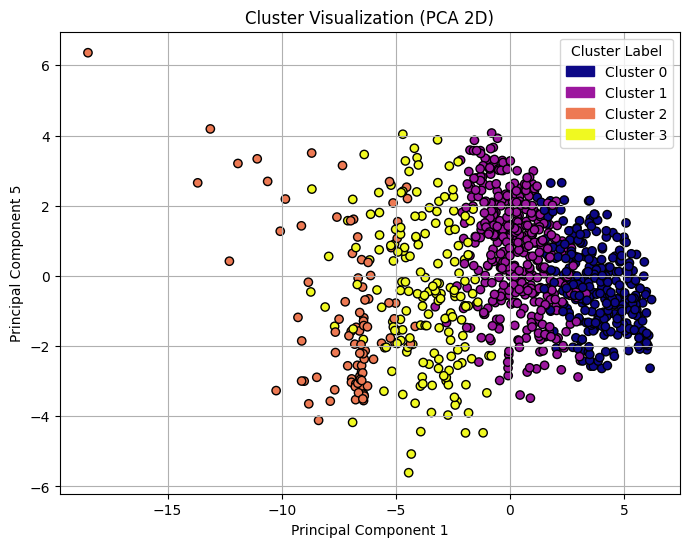

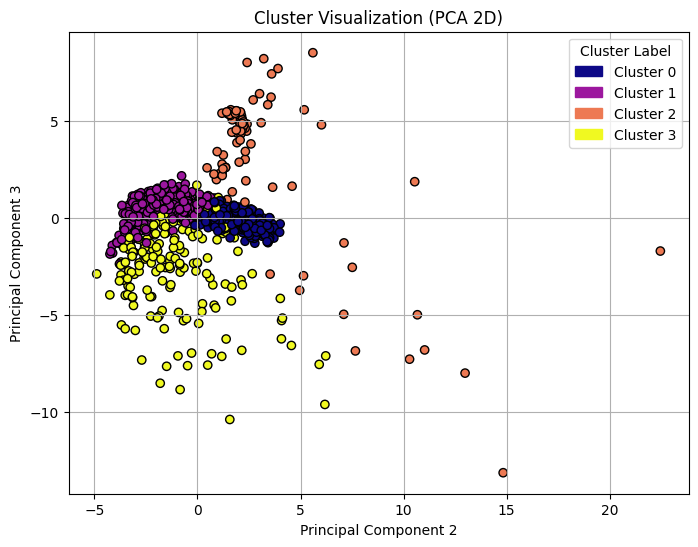

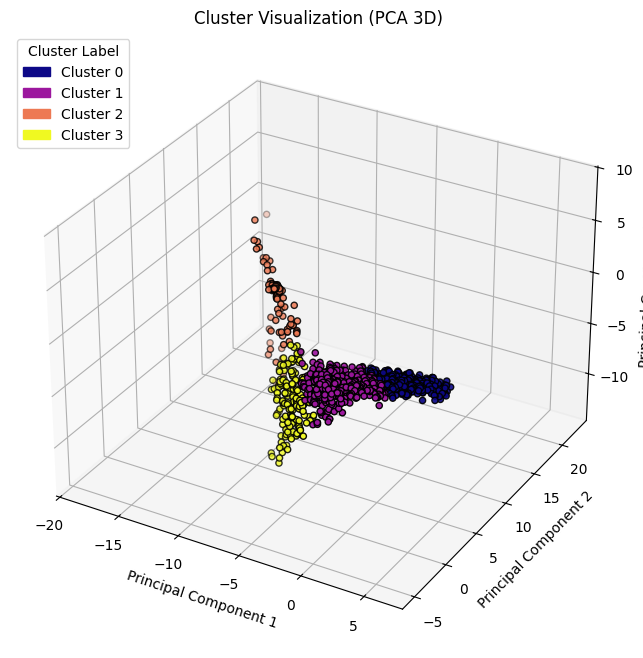

In [53]:
# Plot KMeans clusters from different PCA components

plot_clusters(df_pca, clusters_kmeans)
plot_clusters(df_pca, clusters_kmeans, 0, 2)
plot_clusters(df_pca, clusters_kmeans, 0, 3)
plot_clusters(df_pca, clusters_kmeans, 0 ,4)
plot_clusters(df_pca, clusters_kmeans, 1 ,2)
plot_clusters(df_pca, clusters_kmeans, 0, 1, 2)

### DBSCAN

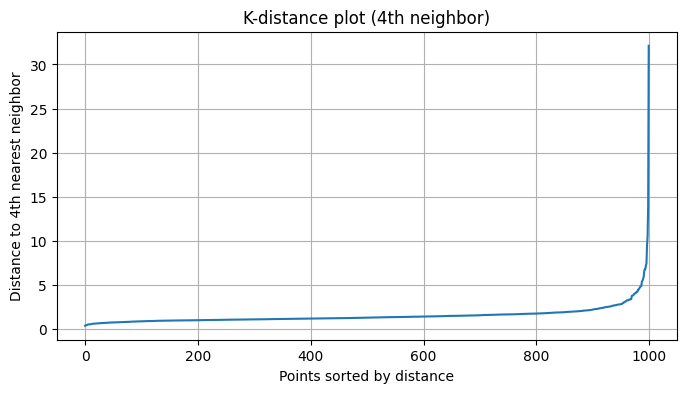

In [54]:
# Fit nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_pca)
distances, indices = neighbors_fit.kneighbors(df_pca)

# Sort distances to find the "knee" point
distances = np.sort(distances[:, 4])  # 4th nearest neighbor distance
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("K-distance plot (4th neighbor)")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 4th nearest neighbor")
plt.grid(True)
plt.show()


In [77]:
# Define the eps range and min_samples
eps_values = np.arange(0.5, 1.0, 0.1)  # Adjust based on your k-distance plot
min_samples = 5

results = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(df_pca)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    # Mask for non-noise points
    mask = labels != -1
    
    # Only evaluate if we have at least 2 clusters and some valid points
    if n_clusters >= 2 and np.sum(mask) > 10:
        silhouette = silhouette_score(df_pca[mask], labels[mask])
        dbi = davies_bouldin_score(df_pca[mask], labels[mask])
    else:
        silhouette = np.nan
        dbi = np.nan
    
    results.append({
        "eps": eps,
        "clusters": n_clusters,
        "noise_points": n_noise,
        "silhouette_score": silhouette,
        "davies_bouldin": dbi
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

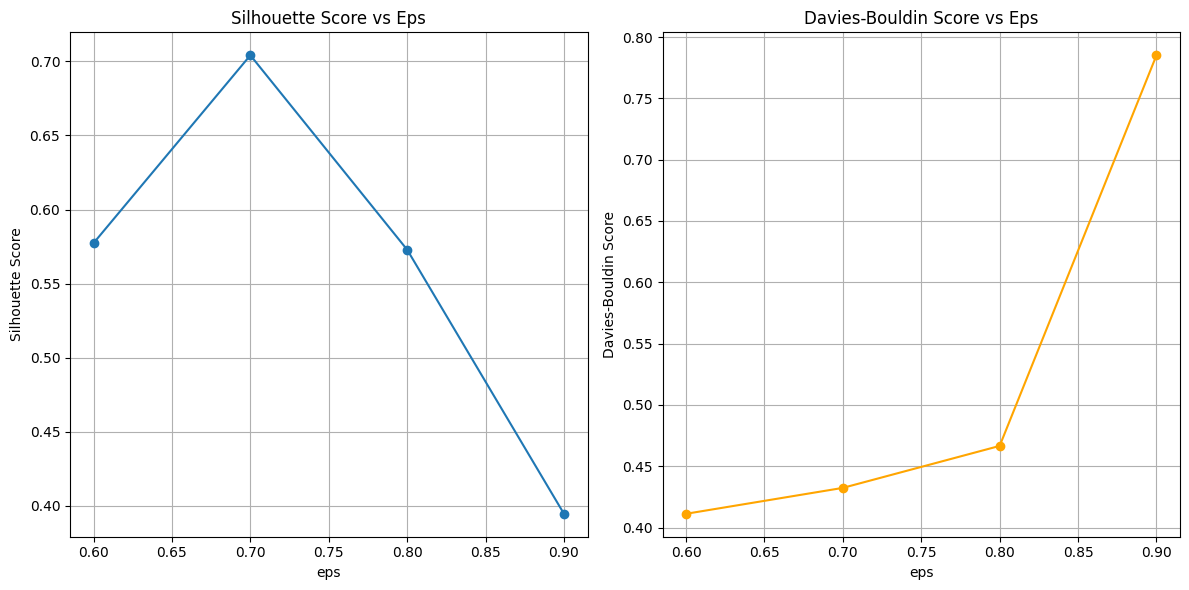

In [78]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results_df["eps"], results_df["silhouette_score"], marker='o')
plt.title("Silhouette Score vs Eps")
plt.xlabel("eps")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(results_df["eps"], results_df["davies_bouldin"], marker='o', color='orange')
plt.title("Davies-Bouldin Score vs Eps")
plt.xlabel("eps")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [79]:
eps = 0.7

dbscan = DBSCAN(eps=eps, min_samples=5)
dbscan.fit(df_pca)

# Add cluster labels to original dataframe
labels = dbscan.labels_  # -1 means noise


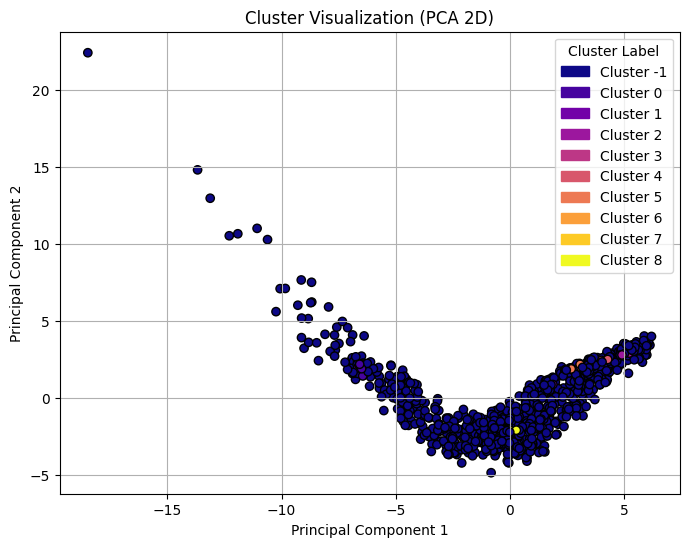

In [80]:
# Plot DBSCAN clusters from different PCA components
plot_clusters(df_pca, labels)

## Add Labels to Output Df

In [59]:
transformed_output_df.head()

,run_id,Resources_final,Resources_max,Resources_min,Resources_auc,Resources_final_initial_diff,Resources_delta_25,Resources_delta_50,Resources_delta_75,Resources_delta_100,...,Pollution_delta_25,Pollution_delta_50,Pollution_delta_75,Pollution_delta_100,Pollution_delta_125,Pollution_delta_150,Pollution_delta_175,Pollution_delta_200,kmeans_cluster_id,dbscan_cluster_id
0,1.0,0.327750,1.0,0.327750,134.085470,-0.672250,-0.001629,-0.003236,-0.005007,-0.005822,...,0.001640,0.002300,0.003124,0.003760,0.003759,0.003144,2.438919e-03,1.970209e-03,2,0
1,2.0,0.002006,1.0,0.001829,38.145268,-0.997994,-0.009890,-0.026944,-0.000004,0.000001,...,0.002359,0.007210,0.030529,0.002166,0.000082,0.000003,1.783411e-07,7.114252e-08,5,1
2,3.0,0.000137,1.0,0.000137,51.722369,-0.999863,-0.005162,-0.020499,-0.003894,-0.000003,...,0.001526,0.003003,0.016088,0.012512,0.000183,0.000004,1.461290e-06,1.433237e-06,4,1
3,4.0,0.007580,1.0,0.006707,49.357691,-0.992420,-0.004429,-0.039234,-0.000186,0.000007,...,0.001257,0.003964,0.048079,0.000132,0.000004,0.000004,3.927006e-06,4.024407e-06,0,1
4,5.0,0.597663,1.0,0.597663,157.144057,-0.402337,-0.001836,-0.002620,-0.002916,-0.002551,...,0.001729,0.002228,0.002628,0.002724,0.002557,0.002337,2.166121e-03,2.037863e-03,2,0


In [60]:
# Add cluster labels to the transformed DataFrame
transformed_output_df["kmeans_cluster_id"] = clusters_kmeans
transformed_output_df["dbscan_cluster_id"] = labels
# Save the transformed DataFrame with cluster labels
transformed_output_df.to_csv(os.path.join(porcessed_data_dir, f'transformed_output_with_{k}_clusters.csv'), index=False)

# Create a new df to map run_id to cluster_id
cluster_mapping_df = transformed_output_df[["run_id", "kmeans_cluster_id", "dbscan_cluster_id"]]

cluster_mapping_df

,run_id,kmeans_cluster_id,dbscan_cluster_id
0,1.0,2,0
1,2.0,0,1
2,3.0,1,1
3,4.0,0,1
4,5.0,2,0
...,...,...,...
995,996.0,0,1
996,997.0,0,1
997,998.0,3,3
998,999.0,1,1


In [61]:
# Check for duplicates in the mapping DataFrame
print('duplicates: ', cluster_mapping_df.duplicated().sum())
# Check for null values in the mapping DataFrame
print('null values: \n', cluster_mapping_df.isnull().sum())

duplicates:  0
null values: 
 run_id               0
kmeans_cluster_id    0
dbscan_cluster_id    0
dtype: int64


In [62]:
output_df.head()

,Resources,Economy,Bureaucracy,Pollution,time,run_id
0,1.000000,0.100000,0.010000,0.001000,0.0,1.0
1,0.999887,0.100171,0.010030,0.001246,0.2,1.0
2,0.999773,0.100343,0.010060,0.001492,0.4,1.0
3,0.999658,0.100516,0.010091,0.001739,0.6,1.0
4,0.999541,0.100689,0.010121,0.001986,0.8,1.0


In [63]:
# Merge the cluster mapping DataFrame with the original output DataFrame
output_df_with_labels = output_df.merge(cluster_mapping_df, on="run_id", how="left")
output_df_with_labels.head()

,Resources,Economy,Bureaucracy,Pollution,time,run_id,kmeans_cluster_id,dbscan_cluster_id
0,1.000000,0.100000,0.010000,0.001000,0.0,1.0,2,0
1,0.999887,0.100171,0.010030,0.001246,0.2,1.0,2,0
2,0.999773,0.100343,0.010060,0.001492,0.4,1.0,2,0
3,0.999658,0.100516,0.010091,0.001739,0.6,1.0,2,0
4,0.999541,0.100689,0.010121,0.001986,0.8,1.0,2,0


In [64]:
output_df_with_labels.tail()

,Resources,Economy,Bureaucracy,Pollution,time,run_id,kmeans_cluster_id,dbscan_cluster_id
1000995,0.004725,0.033576,1.231674e-09,1.137058,199.2,1000.0,0,1
1000996,0.004726,0.033576,1.190023e-09,1.137058,199.4,1000.0,0,1
1000997,0.004727,0.033576,1.149781e-09,1.137059,199.6,1000.0,0,1
1000998,0.004728,0.033576,1.110899e-09,1.137059,199.8,1000.0,0,1
1000999,0.004728,0.033576,1.073332e-09,1.137059,200.0,1000.0,0,1


In [65]:
# Sanity check that each run id is only in one cluster
output_df_with_labels.groupby("run_id")["kmeans_cluster_id"].nunique().value_counts()

kmeans_cluster_id
1    1000
Name: count, dtype: int64

In [66]:

# File name for the processed data
processed_data_file = os.path.join(porcessed_data_dir, f'bardis_ensemble_python_ver_{rows_n}_k{k}_eps{eps}.csv')
# Save the output DataFrame with cluster labels
output_df_with_labels.to_csv(processed_data_file, index=False)

print(f"Processed data saved to {processed_data_file}")


Processed data saved to /home/tony-ubuntu/decision_sciences/looking_back_to_look_forward/results_analysis/processed_data/bardis_ensemble_python_ver_1000_k4_eps1.5.csv
